## Prepare

### This section will prepare our data for exploration. It acheives the following tasks:


- Convert date column to datetime format.

- Plot the distribution of sale_amount, item_price and sale_date.

- Set the index to be the datetime variable.

- Add a 'month' and 'day of week' column to your dataframe, derived from the index using the keywords for those date parts.

- Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

- Using pandas.DataFrame.diff() function, create a new column that is the result of the current sales - the previous days sales.

- Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [1]:
import pandas as pd
import numpy as np
import acquire
from datetime import timedelta, datetime
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('all.csv')

In [3]:
df.shape

(913000, 14)

In [4]:
df.dtypes

item_id            int64
sale_amount      float64
sale_date         object
sale_id            int64
store_id           int64
item_brand        object
item_name         object
item_price       float64
item_upc12         int64
item_upc14         int64
store_address     object
store_city        object
store_state       object
store_zipcode      int64
dtype: object

In [5]:
df.head()

,item_id,sale_amount,sale_date,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253


### - Convert sale_date column to datetime format.

In [6]:
fmt = '%a, %d %b %Y %H:%M:%S %Z'

In [7]:
df.sale_date = pd.to_datetime(df.sale_date, format=fmt)

In [8]:
df.dtypes

item_id                        int64
sale_amount                  float64
sale_date        datetime64[ns, GMT]
sale_id                        int64
store_id                       int64
item_brand                    object
item_name                     object
item_price                   float64
item_upc12                     int64
item_upc14                     int64
store_address                 object
store_city                    object
store_state                   object
store_zipcode                  int64
dtype: object

### - Plot the distribution of sale_amount, item_price and sale_date.

Text(0.5, 1.0, 'Sale Amount Over Time')

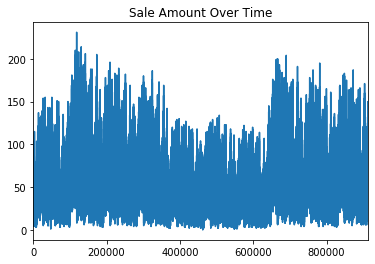

In [9]:
df.sale_amount.plot().set_title('Sale Amount Over Time')

#### Takeaway: Sale amounts experience seasonality. We see a distinct pattern in sale amounts that repeats every year. There also appears to be a slight upward trend as sales are steadily increasing over time. 

Text(0.5, 1.0, 'Item Price Over Time')

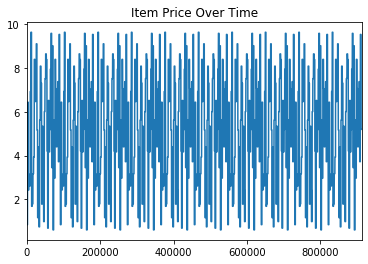

In [10]:
df.item_price.plot().set_title('Item Price Over Time')

#### Takeaway: The price of items has remained constant over time. It does not change thoughout the time period of our data. 

### - Set the index to be the datetime variable.

In [11]:
df = df.sort_values('sale_date').set_index('sale_date')

In [12]:
df.head()

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode
sale_date,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2013-01-01 00:00:00+00:00,17,26.0,295813,3,Ducal,Ducal Refried Red Beans,1.16,88313590791,88313590791,2118 Fredericksburg Rdj,San Antonio,TX,78201
2013-01-01 00:00:00+00:00,7,32.0,125995,10,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,8503 NW Military Hwy,San Antonio,TX,78231
2013-01-01 00:00:00+00:00,18,45.0,314073,3,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,2118 Fredericksburg Rdj,San Antonio,TX,78201
2013-01-01 00:00:00+00:00,19,34.0,332333,3,Careone,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,2118 Fredericksburg Rdj,San Antonio,TX,78201


### - Add a 'month' and 'day of week' column to your dataframe, derived from the index using the keywords for those date parts.

In [13]:
# added the numeric name to the beginning of each new column. This provides more sorting options as we explore the data.
df['month'] = df.index.strftime('%m-%b')
df['day_of_week'] = df.index.strftime('%w-%a')
df[['month', 'day_of_week']].head()

,month,day_of_week
sale_date,,
2013-01-01 00:00:00+00:00,01-Jan,2-Tue
2013-01-01 00:00:00+00:00,01-Jan,2-Tue
2013-01-01 00:00:00+00:00,01-Jan,2-Tue
2013-01-01 00:00:00+00:00,01-Jan,2-Tue
2013-01-01 00:00:00+00:00,01-Jan,2-Tue


### - Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [14]:
# sales_total is equal to sales_amount times item_price
df['sales_total'] = df['sale_amount'] * df['item_price']

### - Using pandas.DataFrame.diff() function, create a new column that is the result of the current sales - the previous days sales.

In [15]:
daily_sales = df.resample('D').sum()

In [16]:
daily_sales['sales_prev_day_difference'] = daily_sales.sales_total.diff()

In [17]:
daily_sales[['sales_total','sales_prev_day_difference']].head()

,sales_total,sales_prev_day_difference
sale_date,,
2013-01-01 00:00:00+00:00,73844.01,NaN
2013-01-02 00:00:00+00:00,73570.58,-273.43
2013-01-03 00:00:00+00:00,78169.48,4598.90
2013-01-04 00:00:00+00:00,84467.73,6298.25
2013-01-05 00:00:00+00:00,87621.85,3154.12


### - Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [18]:
def prep_store_data(df):
    # parse the date column and set it as the index
    fmt = '%a, %d %b %Y %H:%M:%S %Z'
    df.sale_date = pd.to_datetime(df.sale_date, format=fmt)
    df = df.sort_values(by='sale_date').set_index('sale_date')

    # add some time components as features
    df['month'] = df.index.strftime('%m-%b')
    df['weekday'] = df.index.strftime('%w-%a')

    # derive the total sales
    df['sales_total'] = df.sale_amount * df.item_price
    
    return df

In [19]:
def get_sales_by_day(df):
    sales_by_day = df.resample('D')[['sales_total']].sum()
    sales_by_day['diff_with_last_day'] = sales_by_day.sales_total.diff()
    return sales_by_day

## OPS Database

### This section will prepare the OPS database in a similar fashion to the store data above. This section will complete the following:

- Convert date column to datetime format.
- Plot the distribution of each of your variables.
- Set the index to be the datetime variable.
- Add a month and a year column to your dataframe.
- Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.Plot the distribution of each of your variables.

In [20]:
acquire.get_opsd_data()

In [21]:
opsd = pd.read_csv('opsd.csv')

In [22]:
opsd.shape

(4383, 5)

In [23]:
opsd.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

In [24]:
opsd.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


### - Convert date column to datetime format.

In [25]:
opsd['Date'] = opsd['Date'].astype('datetime64')

In [26]:
opsd.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [27]:
opsd.dtypes

Date           datetime64[ns]
Consumption           float64
Wind                  float64
Solar                 float64
Wind+Solar            float64
dtype: object

### - Plot the distribution of each of your variables.

Text(0.5, 1.0, 'Consumption Over Time')

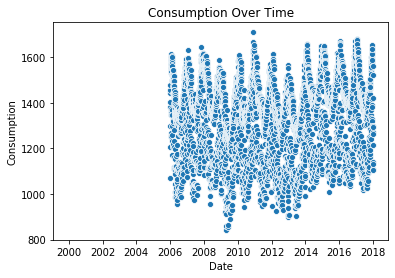

In [28]:
ax = sns.scatterplot(x= 'Date', y= 'Consumption', data= opsd)
ax.set_title("Consumption Over Time")

Text(0.5, 1.0, 'Wind Over Time')

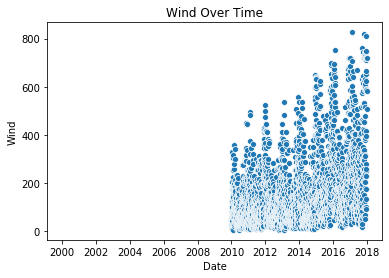

In [29]:
ax = sns.scatterplot(x= 'Date', y= 'Wind', data= opsd)
ax.set_title("Wind Over Time")

Text(0.5, 1.0, 'Solar Over Time')

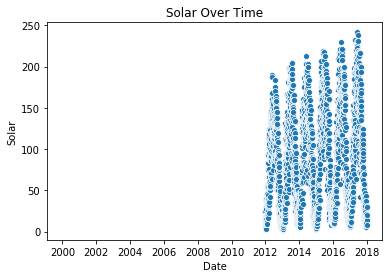

In [30]:
ax = sns.scatterplot(x= 'Date', y= 'Solar', data= opsd)
ax.set_title("Solar Over Time")

Text(0.5, 1.0, 'Wind and Solar Over Time')

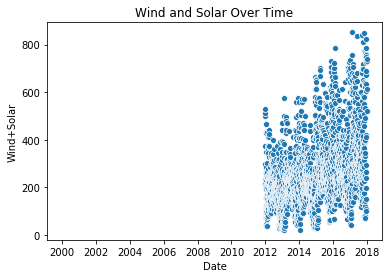

In [31]:
ax = sns.scatterplot(x= 'Date', y= 'Wind+Solar', data= opsd)
ax.set_title("Wind and Solar Over Time")

### - Set the index to be the datetime variable.

In [32]:
opsd = opsd.sort_values('Date').set_index('Date')

In [33]:
opsd.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN


### - Add a month and a year column to your dataframe.

In [34]:
opsd['month'] = opsd.index.strftime('%m-%b')

In [35]:
opsd['year'] = opsd.index.strftime('%Y')

In [36]:
opsd.head(3)

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,01-Jan,2006
2006-01-02,1380.521,NaN,NaN,NaN,01-Jan,2006
2006-01-03,1442.533,NaN,NaN,NaN,01-Jan,2006


In [37]:
def prep_opsd(opsd):
    opsd['Date'] = opsd['Date'].astype('datetime64')
    opsd = opsd.sort_values('Date').set_index('Date')
    opsd['month'] = opsd.index.strftime('%m-%b')
    opsd['year'] = opsd.index.strftime('%Y')
    return opsd